# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import math
import random
print ("Modules Imported!")

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

Text(0, 0.5, 'Number of Students')

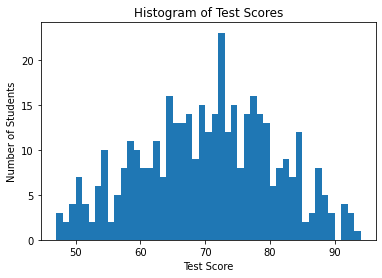

In [2]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=int(np.max(x)-np.min(x))) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

[-0.73484902  0.44479879  1.39248177  1.39116828 -0.05736744  2.11391055
  2.05893292 -0.38403451 -0.19898715 -0.45078579  0.38696097 -0.51481894
  0.16073139  0.95726964 -0.44167439  0.83635375 -0.56502643 -0.94583934
  0.41141252 -0.21126165  1.12939255 -0.72281918 -0.93905743 -2.06638665
  0.89317519 -0.01007022  1.66225313  1.64066547  0.40396305  0.79262563
  0.74740785 -1.62402596  0.01375374 -2.41979066  0.11951188  0.17945126
 -1.19733683  1.43873124  1.20439132 -1.04826952 -0.33182553  0.43524578
  0.02980325 -0.42238253 -0.55230937  0.65456168 -1.01360504  0.37468853
  3.49496646 -0.65555467 -1.0330698  -0.32992892 -1.34520744 -0.43954748
  0.04584981  0.2920073  -0.10966609  0.82717217  0.65680682  1.51249384
 -0.45601998  0.14863166  0.34513629 -0.25999768 -0.61169913 -0.53259232
  0.27980066 -0.9113015  -0.12609676 -0.30819306 -0.80533712 -0.7494712
  0.59251719  0.30225194 -2.17820412 -1.11614966 -0.37649045 -0.09896386
 -2.34706715  2.76326974 -0.47432993  0.70782712  1.

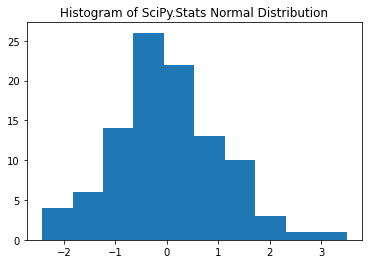

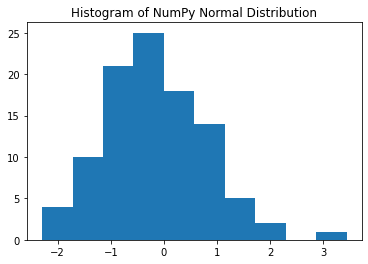

In [34]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
# np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
# np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y)
plt.title('Histogram of NumPy Normal Distribution')
print(X)
print(x)

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): 

1. Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect?
2. Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

Text(0.5, 1.0, 'Histogram of Dice Rolls when n = 10000')

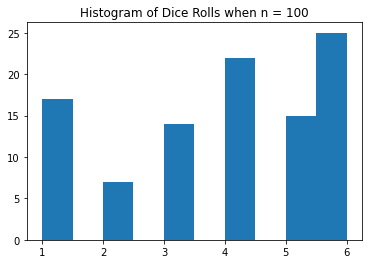

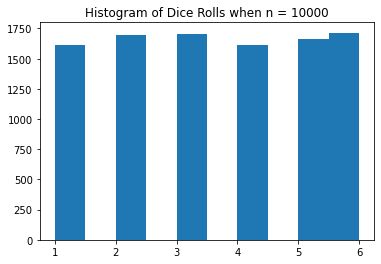

In [30]:
# Your code here

n = 100 # the amount of rolls that will happen
N = 10000 # the amount of rolls that will happen
p = tuple(np.full(6, 1/6)) # vector of probabilities
c = (1,2,3,4,5,6) # vector of values
Xcstm = st.rv_discrete(values=(c,p)) #creates an instance of a class


x = Xcstm.rvs(size = n) # for number 1
X = Xcstm.rvs(size = N) # for number 2

# Number 1
plt.hist(x) # plot number 1
plt.title("Histogram of Dice Rolls when n = 100")

plt.figure()

# Number 2
plt.hist(X) # plot number 2
plt.title("Histogram of Dice Rolls when n = 10000")


__Answer:__ 
1. Not really what I expected since the dice has a same amount of probability of occuring. But the histogram shows an significance difference between the rolls
2. When the sample size is increased, it shows less difference, therefore showing that the probability of every value = 1/6 true

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 1</SPAN>**

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

[10, 7, 6, 5, 10, 8, 8, 8]
[4, 7, 3, 9, 7, 6, 7, 7]
[0, 7, 13, 18, 28, 36, 44, 52]
[0, 7, 10, 19, 26, 32, 39, 46]
[0.0, 7.0, 6.5, 6.0, 7.0, 7.2, 7.333333333333333, 7.428571428571429]
[0.0, 7.0, 5.0, 6.333333333333333, 6.5, 6.4, 6.5, 6.571428571428571]


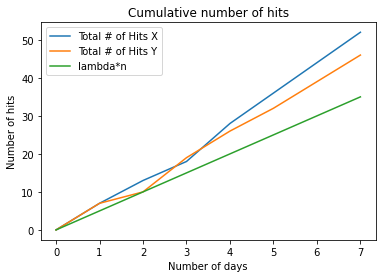

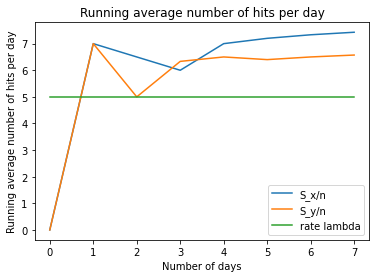

In [79]:
lamb = 5. #Our rate of hits per day
N = 7 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

print(x)
print(y)
print(Sx)
print(Sy)
print(Ax)
print(Ay)
n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. 

1. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ 
2. What would be a rough approximation of the sum? Of the average?  

(Note: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same role.)

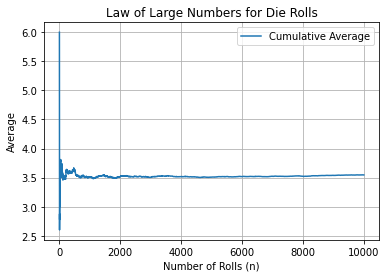

In [136]:
mu = 3.5

num_rolls = 10000 # amount of rolls that is going to occur
die_rolls = st.poisson.rvs(mu, size=num_rolls) # the rolls

# Calculate the cumulative average of the rolls
cumulative_average = np.cumsum(die_rolls) / np.arange(1, num_rolls + 1) # the cummulative average of the sum

# Plot the results
plt.plot(range(1, num_rolls + 1), cumulative_average, label='Cumulative Average')
plt.xlabel('Number of Rolls (n)')
plt.ylabel('Average')
plt.legend()
plt.title('Law of Large Numbers for Die Rolls')
plt.grid(True)
plt.show()

__Answer:__ According to the graph that the code has plotted, it would be staying in 3.5 which is equivalent to if u sum up all the values of a dice and divide it by 6

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 2</SPAN>**

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Calculate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH; print out these probabilities. You need to write down your calculation process, either in a markdown or code cell, not just the result probabilities. (Note: FLUSHes include straight/royal FLUSHes) </li> 
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands. (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.  The np.sum command can be used to compute row or column sums. If you don't know how to generate random integers in Python, Google is a good source for help.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

(For most lab questions in ECE314, you will be graded based on the correctness of your answers, regardless of how you code. However, for part 2 of this problem, you may lose a few points for very inefficient code, e.g. with a lot of for loops and unecessary if structures. As a general guideline, if your program can run in one minute (for 1,000,000 hands), it should be sufficiently efficient, although this is not a hard requirement). 

In [569]:
# Your code here (add addtitional code/markdown cells if needed)
# Number 1
denom = math.comb(52,5) # for the denominator

twopair_prob = (math.comb(13,2) * (math.comb(4,2)**2) * math.comb(11,1) * math.comb(4, 1))/denom # the probability of two pair occuring
print(twopair_prob*100)

threeofakind_prob = (math.comb(13,1)*math.comb(4,3)*math.comb(12,2)*(math.comb(4,1)**2))/denom # the probability of three of a kind occuring
print(threeofakind_prob*100)

fullhouse_prob = (math.comb(13,1) * math.comb(4,3) * math.comb(12,1) * math.comb(4,2))/denom # the probability of a fullhouse occuring
print(fullhouse_prob*100)

normalflush_prob = (math.comb(13,5)*math.comb(4,1) - math.comb(10,1)*math.comb(4,1))/denom
straightflush_prob = (math.comb(10,1)*math.comb(4,1) - math.comb(4,1))/denom
royalflush_prob = math.comb(4,1)/denom

allflush_prob = (normalflush_prob + straightflush_prob + royalflush_prob) # probability of a flush occuring
print(allflush_prob*100)

print("note that all probabilities printed are in %")

4.75390156062425
2.112845138055222
0.14405762304921968
0.19807923169267708
note that all probabilities printed are in %


In [648]:
# Number 2
n = 1000000 # number of iterations
different_cards = [2,3,4,5,6,7,8,9,10,11,12,13,14] # card decks
# 11 is J
# 12 is Q
# 13 is K
# 14 is A
different_ranks = ["D", "C", "H", "S"] # card suits

deck = [(card, rank) for card in different_cards for rank in different_ranks] # to make all the possibilities from the deck

pokerhands_counter = {
    "two_pair" : 0,
    "three_of_a_kind": 0,
    "full_house": 0,
    "flush": 0
} # a dictionary to keep track of the count of occurences happening

# this function returns a boolean whether there are two pairs or no
def is_two_pairs(cards):
    temp_card = {}
    for card in cards:
        if card in temp_card:
            temp_card[card] += 1
        else:
            temp_card[card] = 1
    count_of_twos = sum(1 for count in temp_card.values() if count == 2)
    return count_of_twos == 2

# this function returns a boolean whether there are three of a kinds or no
def is_three_of_akind(cards):
    temp_card = {}
    for card in cards:
        if card in temp_card:
            temp_card[card] += 1
        else:
            temp_card[card] = 1
    count_of_twos = sum(1 for count in temp_card.values() if count == 3)
    return count_of_twos == 1

# this function returns a boolean whether there is a full house or no
def is_full_house(cards):
    temp_card = {}
    for card in cards:
        if card in temp_card:
            temp_card[card] += 1
        else:
            temp_card[card] = 1
    return 3 in temp_card.values() and 2 in temp_card.values()

# this function returns a boolean whether there is a flush or no, regardless of any type
def is_flush(rank):
    return all(element == rank[0] for element in rank)

# this function is the main logic to do implement the above functions and to shuffle the deck and to extract the deck that we will use for testing
def small_loop():
    random.shuffle(deck)
    hand = deck[:5]
    temporary_card = [card for card, _ in hand]
    temporary_rank = [rank for _, rank in hand]
    if is_two_pairs(temporary_card):
        pokerhands_counter["two_pair"] += 1

    elif is_full_house(temporary_card):
        pokerhands_counter["full_house"] += 1

    elif is_three_of_akind(temporary_card):
        pokerhands_counter["three_of_a_kind"] += 1

    elif is_flush(temporary_rank):
        pokerhands_counter["flush"] += 1

# this function is used for map()
def divider(x):
    return (x / n)*100 

def main():
    for i in range(0, n + 1): # iterate 1000000 times
        small_loop()

    # print(pokerhands_counter)
    values_list = list(pokerhands_counter.values())
    probability_of_each = list(map(divider, values_list))
    for i in probability_of_each:
        print(f"{i}%")
    
    
main()

4.7745999999999995%
2.1237%
0.1431%
0.1972%


__Answer:__ yes, the probability matches up relatively well between the two ways that they are counted

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 3</SPAN>**

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

In the simulation, you can simulate every step that happens in the actual game and exactly as it happens, even for very trivial steps. You can also clever-guess some parts and skip some trivial steps; if you do that, make sure you briefly reason about why you do so in comments, so that the graders know that you understand what actually happens in the game. There is no timing requirement for this problem.  

__Answer of Part 1:__ I would keep the one I have because logically it would be a 50 - 50 chance

In [646]:
# Your code here (add addtitional code/markdown cells if needed)
n = 1000000 # number of iterations
choices = ["goat", "goat", "gold"] # the choices

# counters to see how the results
switching_counter = 0 
non_switching_counter = 0

def the_switching_logic():

    global switching_counter, non_switching_counter # we use global variable to update the switching and non switching counter
    random.shuffle(choices) # shuffle the choices
    my_choice = random.randint(0,2) # my random choice
    
    only_goat_list = [i for i in range(0,3) if i != my_choice and choices[i] == "goat"] # filter out the list so the host can choose
    host_pick = random.choice(only_goat_list) # host picks one

    my_final_choice = [i for i in range(0,3) if i != my_choice and i != host_pick][0] # this takes the first index of the list that changes the choice from the one i choose before

    if choices[my_choice] == "gold":
        non_switching_counter += 1 # if correct add to non_switching_counter
    elif choices[my_final_choice] == "gold":
        switching_counter += 1 # if correct add to switching_counter

def main(): # main function to run the whole thing
    for i in range(0, n + 1):
        the_switching_logic()

    print(f"probability of winning when switching always: {switching_counter/n * 100}%")
    print(f"probability of winning when not switching always: {non_switching_counter/n * 100}%")


main()




    


probability of winning when switching always: 66.6075%
probability of winning when not switching always: 33.3926%


__Answer of Part 4:__ The switching case since it approximately wins 2/3 of the time. it is because that if u initially chose goat which is 2/3 of the choices, it guarantees u of winning the gold because the unopened door is definitely a car. while if u choose car and switch, it only happens in 1/3 of the time

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">End of Problem 4</SPAN>**

<div class="alert alert-block alert-warning"> 
## Academic Integrity Statement ##

By submitting the lab with this statement, you declare you have written up the lab entirely by yourself, including both code and markdown cells. You also agree that you should not share your code with anyone else. Any violation of the academic integrity requirement may cause an academic integrity report to be filed that could go into your student record. See <a href="https://provost.illinois.edu/policies/policies/academic-integrity/students-quick-reference-guide-to-academic-integrity/">Students' Quick Reference Guide to Academic Integrity</a> for more information. 